In [1]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import sys

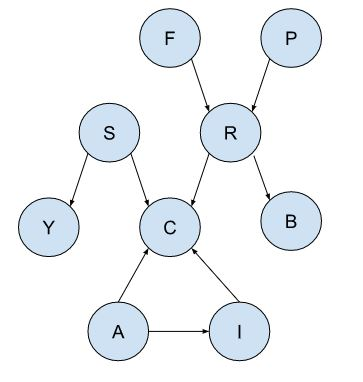

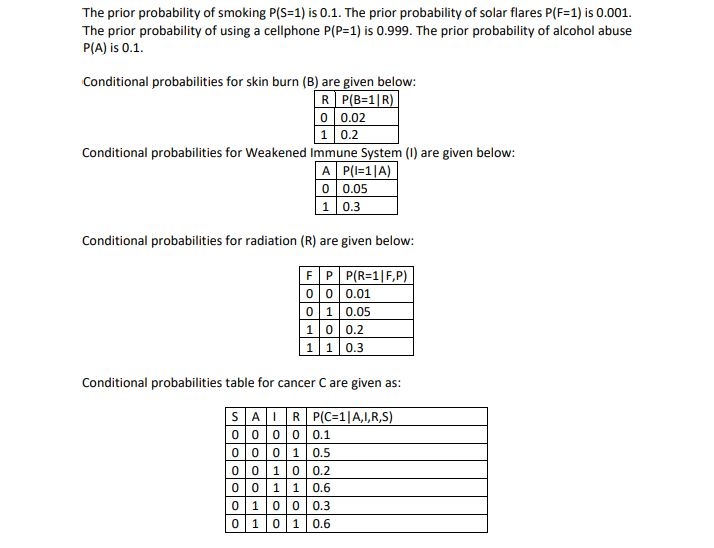

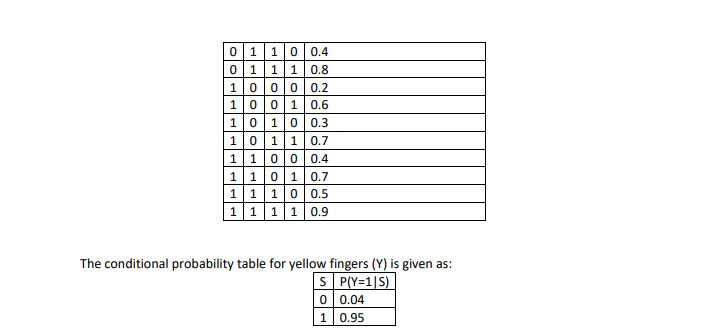

In [3]:
model = BayesianModel([('F', 'R'), ('P', 'R'), ('R', 'C'), ('R', 'B'), ('A', 'C'), ('A', 'I'), ('I', 'C'), \
                       ('S', 'Y'), ('S', 'C')])

# Enter conditional probability distribution for each variable
# Prior probability for F
cpd_F = TabularCPD(variable='F', variable_card=2, values=[[0.999], [0.001]])

# Prior probability for P
cpd_P = TabularCPD(variable='P', variable_card=2, values=[[0.001], [0.999]])

# Prior probability for S
cpd_S = TabularCPD(variable='S', variable_card=2, values=[[0.9], [0.1]])

# Prior probability for A
cpd_A = TabularCPD(variable='A', variable_card=2, values=[[0.9], [0.1]])

# Conditional probability for P(R| F, P)
cpd_R = TabularCPD(variable='R',variable_card=2, values = [[0.99, 0.95, 0.8, 0.7],
                                  [0.01, 0.05, 0.2, 0.3]],
                                  evidence = ['F', 'P'],
                                  evidence_card=[2, 2])

# Conditional probability for P(B|R)
cpd_B = TabularCPD(variable='B', variable_card=2, values = [[0.98, 0.8],
                                  [0.02, 0.2]],
                                  evidence = ['R'],
                                  evidence_card=[2])

# Conditional probability for P(C|S, A, I, R)
cpd_C = TabularCPD(variable='C', variable_card=2, values = [
                                  [0.9, 0.5, 0.8, 0.4, 0.7, 0.4, 0.6, 0.2, 0.8, 0.4, 0.7, 0.3, 0.6, 0.3, 0.5, 0.1],
                                  [0.1, 0.5, 0.2, 0.6, 0.3, 0.6, 0.4, 0.8, 0.2, 0.6, 0.3, 0.7, 0.4, 0.7, 0.5, 0.9]],
                                  evidence = ['S', 'A', 'I', 'R'],
                                  evidence_card=[2, 2, 2, 2])

# Conditional probability for P(I|A)
cpd_I = TabularCPD(variable='I',variable_card=2, values = [[0.95, 0.7],
                                  [0.05, 0.3]],
                                  evidence = ['A'],
                                  evidence_card=[2])

# Conditional probability for P(Y|S)
cpd_Y = TabularCPD(variable='Y', variable_card=2, values = [[0.96, 0.05],
                                  [0.04, 0.95]],
                                  evidence = ['S'],
                                  evidence_card=[2])

model.add_cpds(cpd_F, cpd_P, cpd_S, cpd_A, cpd_R, cpd_B, cpd_C, cpd_I, cpd_Y)

E:\conda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [4]:
print(model.check_model())
print(model.get_cpds('C'))

cpd = model.get_cpds('C')
print('vars:', cpd.variable)

True
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| S    | S(0) | S(0) | S(0) | S(0) | S(0) | S(0) | S(0) | S(0) | S(1) | S(1) | S(1) | S(1) | S(1) | S(1) | S(1) | S(1) |
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| A    | A(0) | A(0) | A(0) | A(0) | A(1) | A(1) | A(1) | A(1) | A(0) | A(0) | A(0) | A(0) | A(1) | A(1) | A(1) | A(1) |
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) | I(0) | I(0) | I(1) | I(1) | I(0) | I(0) | I(1) | I(1) | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| R    | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) | R(0) | R(1) |
+------+------+------+-----

In [5]:
print(model.check_model())
print(model.get_cpds('R'))

cpd = model.get_cpds('R')
print('vars:', cpd.variable)

True
+------+------+------+------+------+
| F    | F(0) | F(0) | F(1) | F(1) |
+------+------+------+------+------+
| P    | P(0) | P(1) | P(0) | P(1) |
+------+------+------+------+------+
| R(0) | 0.99 | 0.95 | 0.8  | 0.7  |
+------+------+------+------+------+
| R(1) | 0.01 | 0.05 | 0.2  | 0.3  |
+------+------+------+------+------+
vars: R


In [6]:
from pgmpy.inference import VariableElimination

# Going to do variable elimination
infer = VariableElimination(model)

# Compute probability of RADIATION given CANCER
phi_query = infer.query(['R'], evidence={'C':1}, joint = False)
factor = phi_query['R']
print('Probability of RADIATION given CANCER')
print(factor)


Probability of RADIATION given CANCER
+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.8306 |
+------+----------+
| R(1) |   0.1694 |
+------+----------+


E:\conda\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [7]:
# Compute probability of cancer given skin burn, yellow fingers and abuses alcohol.
phi_query = infer.query(['C'], evidence={'B':1, 'Y':1, 'A':1}, joint = False)
factor = phi_query['C']
print('probability of cancer given skin burn, yellow fingers and abuses alcohol')
print(factor)

probability of cancer given skin burn, yellow fingers and abuses alcohol
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.4834 |
+------+----------+
| C(1) |   0.5166 |
+------+----------+


In [8]:
# Compute probability of RADIATION given CANCER
phi_query = infer.query(['S'], evidence={'C':1,'R':1, 'B':1}, joint = False)
factor = phi_query['S']
print('Probability of Smoking given CANCER is present and skin burn is present')
print(factor)
print()
phi_query = infer.query(['S'], evidence={'C':1,'R':1, 'B':0}, joint = False)
factor = phi_query['S']
print('Probability of Smoking given CANCER is present and skin burn is not present')
print(factor)



Probability of Smoking given CANCER is present and skin burn is present
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8830 |
+------+----------+
| S(1) |   0.1170 |
+------+----------+

Probability of Smoking given CANCER is present and skin burn is not present
+------+----------+
| S    |   phi(S) |
+======+==========+
| S(0) |   0.8830 |
+------+----------+
| S(1) |   0.1170 |
+------+----------+


In [9]:
# Compute probability of cancer given skin burn, yellow fingers and abuses alcohol.
phi_query = infer.query(['C'], evidence={'P':0, 'A':0}, joint = False)
factor = phi_query['C']
print('probability of cancer given never abused alochol or used a cellphone')
print(factor)

probability of cancer given never abused alochol or used a cellphone
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.8809 |
+------+----------+
| C(1) |   0.1191 |
+------+----------+
